In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [2]:
!pip install folium

In [3]:
sns.set_palette(palette="pastel")
import folium
from folium.plugins import FastMarkerCluster


In [4]:
df = pd.read_excel("C:/Users/HP/Downloads/PP_RE_01+-+House+Price+Prediction/innercity.xlsx")


In [5]:
df.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3876100940,20150427T000000,600000,4.0,1.75,3050.0,9440.0,1,0,0.0,...,1250.0,1966,0,98034,47.7228,-122.183,2020.0,8660.0,0.0,12490
1,3145600250,20150317T000000,190000,2.0,1.00,670.0,3101.0,1,0,0.0,...,0.0,1948,0,98118,47.5546,-122.274,1660.0,4100.0,0.0,3771
2,7129303070,20140820T000000,735000,4.0,2.75,3040.0,2415.0,2,1,4.0,...,0.0,1966,0,98118,47.5188,-122.256,2620.0,2433.0,0.0,5455
3,7338220280,20141010T000000,257000,3.0,2.50,1740.0,3721.0,2,0,0.0,...,0.0,2009,0,98002,47.3363,-122.213,2030.0,3794.0,0.0,5461
4,7950300670,20150218T000000,450000,2.0,1.00,1120.0,4590.0,1,0,0.0,...,0.0,1924,0,98118,47.5663,-122.285,1120.0,5100.0,0.0,5710


In [6]:
pd.options.display.max_columns = None

In [7]:
df.head(5)

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3876100940,20150427T000000,600000,4.0,1.75,3050.0,9440.0,1,0,0.0,3,8.0,1800.0,1250.0,1966,0,98034,47.7228,-122.183,2020.0,8660.0,0.0,12490
1,3145600250,20150317T000000,190000,2.0,1.00,670.0,3101.0,1,0,0.0,4,6.0,670.0,0.0,1948,0,98118,47.5546,-122.274,1660.0,4100.0,0.0,3771
2,7129303070,20140820T000000,735000,4.0,2.75,3040.0,2415.0,2,1,4.0,3,8.0,3040.0,0.0,1966,0,98118,47.5188,-122.256,2620.0,2433.0,0.0,5455
3,7338220280,20141010T000000,257000,3.0,2.50,1740.0,3721.0,2,0,0.0,3,8.0,1740.0,0.0,2009,0,98002,47.3363,-122.213,2030.0,3794.0,0.0,5461
4,7950300670,20150218T000000,450000,2.0,1.00,1120.0,4590.0,1,0,0.0,3,7.0,1120.0,0.0,1924,0,98118,47.5663,-122.285,1120.0,5100.0,0.0,5710


In [8]:
df.shape


(21613, 23)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

We do not actually require these columns for our EDA - dayhours, cid, ceil, coast, yr_built, long


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cid,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.401822e+05,3.673622e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
room_bed,21505.0,3.371355e+00,9.302886e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
room_bath,21505.0,2.115171e+00,7.702481e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
living_measure,21596.0,2.079861e+03,9.184961e+02,2.900000e+02,1.429250e+03,1.910000e+03,2.550000e+03,1.354000e+04
lot_measure,21571.0,1.510458e+04,4.142362e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068450e+04,1.651359e+06
sight,21556.0,2.343663e-01,7.664376e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
quality,21612.0,7.656857e+00,1.175484e+00,1.000000e+00,7.000000e+00,7.000000e+00,8.000000e+00,1.300000e+01
ceil_measure,21612.0,1.788367e+03,8.281025e+02,2.900000e+02,1.190000e+03,1.560000e+03,2.210000e+03,9.410000e+03
basement,21612.0,2.915225e+02,4.425808e+02,0.000000e+00,0.000000e+00,0.000000e+00,5.600000e+02,4.820000e+03


In [11]:
pd.options.display.float_format = '{:,.1f}'.format #this will remove the "e"

df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
cid,"21,613.0",NaN,NaN,NaN,"4,580,301,520.9","2,876,565,571.3","1,000,102.0","2,123,049,194.0","3,904,930,410.0","7,308,900,445.0","9,900,000,190.0"
dayhours,21613,372,20140623T000000,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,"21,613.0",NaN,NaN,NaN,"540,182.2","367,362.2","75,000.0","321,950.0","450,000.0","645,000.0","7,700,000.0"
room_bed,"21,505.0",NaN,NaN,NaN,3.4,0.9,0.0,3.0,3.0,4.0,33.0
room_bath,"21,505.0",NaN,NaN,NaN,2.1,0.8,0.0,1.8,2.2,2.5,8.0
living_measure,"21,596.0",NaN,NaN,NaN,"2,079.9",918.5,290.0,"1,429.2","1,910.0","2,550.0","13,540.0"
lot_measure,"21,571.0",NaN,NaN,NaN,"15,104.6","41,423.6",520.0,"5,040.0","7,618.0","10,684.5","1,651,359.0"
ceil,"21,571.0",7.0,1.0,"10,647.0",NaN,NaN,NaN,NaN,NaN,NaN,NaN
coast,"21,612.0",3.0,0.0,"21,421.0",NaN,NaN,NaN,NaN,NaN,NaN,NaN
sight,"21,556.0",NaN,NaN,NaN,0.2,0.8,0.0,0.0,0.0,0.0,4.0


In [12]:
df.describe().T
# .T (transpose) is used for improving the readability of the data.

,count,mean,std,min,25%,50%,75%,max
cid,"21,613.0","4,580,301,520.9","2,876,565,571.3","1,000,102.0","2,123,049,194.0","3,904,930,410.0","7,308,900,445.0","9,900,000,190.0"
price,"21,613.0","540,182.2","367,362.2","75,000.0","321,950.0","450,000.0","645,000.0","7,700,000.0"
room_bed,"21,505.0",3.4,0.9,0.0,3.0,3.0,4.0,33.0
room_bath,"21,505.0",2.1,0.8,0.0,1.8,2.2,2.5,8.0
living_measure,"21,596.0","2,079.9",918.5,290.0,"1,429.2","1,910.0","2,550.0","13,540.0"
lot_measure,"21,571.0","15,104.6","41,423.6",520.0,"5,040.0","7,618.0","10,684.5","1,651,359.0"
sight,"21,556.0",0.2,0.8,0.0,0.0,0.0,0.0,4.0
quality,"21,612.0",7.7,1.2,1.0,7.0,7.0,8.0,13.0
ceil_measure,"21,612.0","1,788.4",828.1,290.0,"1,190.0","1,560.0","2,210.0","9,410.0"
basement,"21,612.0",291.5,442.6,0.0,0.0,0.0,560.0,"4,820.0"


In [13]:
df.drop(["cid", "dayhours", "zipcode"], axis=1, inplace=True)
#removing unwanted columns.

In [14]:
df.head(1)

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,lat,long,living_measure15,lot_measure15,furnished,total_area
0,600000,4.0,1.8,"3,050.0","9,440.0",1,0,0.0,3,8.0,"1,800.0","1,250.0",1966,0,47.7,-122.2,"2,020.0","8,660.0",0.0,12490


As you can see, the three columns are confirmed to be dropped.


In [15]:
# Columns having non alpha-numeric character "$"
display((df == "$").sum()[(df == "$").sum()>0])
display((df == "$").sum()[(df == "$").sum()>0].sum())

ceil          30
coast         30
condition     28
yr_built      14
long          34
total_area    39
dtype: int64

175

In [16]:
df.dtypes

price                 int64
room_bed            float64
room_bath           float64
living_measure      float64
lot_measure         float64
ceil                 object
coast                object
sight               float64
condition            object
quality             float64
ceil_measure        float64
basement            float64
yr_built             object
yr_renovated          int64
lat                 float64
long                 object
living_measure15    float64
lot_measure15       float64
furnished           float64
total_area           object
dtype: object

In [17]:
def contains_non_numeric(column):
    return df[column].astype(str).str.contains(r'\D').any()

# Check each column
non_numeric_columns = [col for col in df.columns if contains_non_numeric(col)]

print("Columns with non-numeric characters:", non_numeric_columns)

Columns with non-numeric characters: ['room_bed', 'room_bath', 'living_measure', 'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure', 'basement', 'yr_built', 'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished', 'total_area']


In [18]:
# Columns having non alpha-numeric character "$"
display((df == "$").sum()[(df == "$").sum()>0])
display((df == "$").sum()[(df == "$").sum()>0].sum())



ceil          30
coast         30
condition     28
yr_built      14
long          34
total_area    39
dtype: int64

175

In [19]:
df = df.replace({"$": np.nan}, regex=True)
#we replaced all the $ values with np.nan

In [20]:
display((df == "$").sum()[(df == "$").sum()>0])
display((df == "$").sum()[(df == "$").sum()>0].sum())

Series([], dtype: int64)

0

As you can see, there are no $ values anymore.


In [21]:
df.isna().sum().sum()

864

There are 864 cells with null values.
Therefore, we are dropping them.


In [22]:
df = df.dropna(axis=0)

In [23]:
df.isna().sum().sum()

0

There are 0 null values in the dataset now.


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21288 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21288 non-null  int64  
 1   room_bed          21288 non-null  float64
 2   room_bath         21288 non-null  float64
 3   living_measure    21288 non-null  float64
 4   lot_measure       21288 non-null  float64
 5   ceil              21288 non-null  float64
 6   coast             21288 non-null  float64
 7   sight             21288 non-null  float64
 8   condition         21288 non-null  float64
 9   quality           21288 non-null  float64
 10  ceil_measure      21288 non-null  float64
 11  basement          21288 non-null  float64
 12  yr_built          21288 non-null  float64
 13  yr_renovated      21288 non-null  int64  
 14  lat               21288 non-null  float64
 15  long              21288 non-null  float64
 16  living_measure15  21288 non-null  float6

yr_built datatype should be changed to int64, because years will not have decimal values.


In [25]:
df["yr_built"] = df["yr_built"].astype("int64") 

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21288 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21288 non-null  int64  
 1   room_bed          21288 non-null  float64
 2   room_bath         21288 non-null  float64
 3   living_measure    21288 non-null  float64
 4   lot_measure       21288 non-null  float64
 5   ceil              21288 non-null  float64
 6   coast             21288 non-null  float64
 7   sight             21288 non-null  float64
 8   condition         21288 non-null  float64
 9   quality           21288 non-null  float64
 10  ceil_measure      21288 non-null  float64
 11  basement          21288 non-null  float64
 12  yr_built          21288 non-null  int64  
 13  yr_renovated      21288 non-null  int64  
 14  lat               21288 non-null  float64
 15  long              21288 non-null  float64
 16  living_measure15  21288 non-null  float6

In [27]:
df["yr_renovated"] = df["yr_renovated"].astype("int64") 

In [28]:
df["yr_renovated"].value_counts()

0       20395
2014       89
2013       37
2003       36
2007       35
        ...  
1948        1
1959        1
1951        1
1944        1
1954        1
Name: yr_renovated, Length: 70, dtype: int64

Since there are too many zeroes, we can drop this column "yr_renovated".


In [29]:
df.drop("yr_renovated", axis=1, inplace=True)

In [30]:
df.columns

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure',
       'basement', 'yr_built', 'lat', 'long', 'living_measure15',
       'lot_measure15', 'furnished', 'total_area'],
      dtype='object')

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,"21,288.0","539,982.6","365,602.8","75,000.0","321,020.2","450,000.0","645,000.0","7,700,000.0"
room_bed,"21,288.0",3.4,0.9,0.0,3.0,3.0,4.0,33.0
room_bath,"21,288.0",2.1,0.8,0.0,1.8,2.2,2.5,8.0
living_measure,"21,288.0","2,080.1",917.7,290.0,"1,430.0","1,910.0","2,550.0","13,540.0"
lot_measure,"21,288.0","15,108.2","41,428.7",520.0,"5,040.0","7,620.0","10,682.5","1,651,359.0"
ceil,"21,288.0",1.5,0.5,1.0,1.0,1.5,2.0,3.5
coast,"21,288.0",0.0,0.1,0.0,0.0,0.0,0.0,1.0
sight,"21,288.0",0.2,0.8,0.0,0.0,0.0,0.0,4.0
condition,"21,288.0",3.4,0.7,1.0,3.0,3.0,4.0,5.0
quality,"21,288.0",7.7,1.2,1.0,7.0,7.0,8.0,13.0


In [32]:
X=df.drop('price',axis=1)

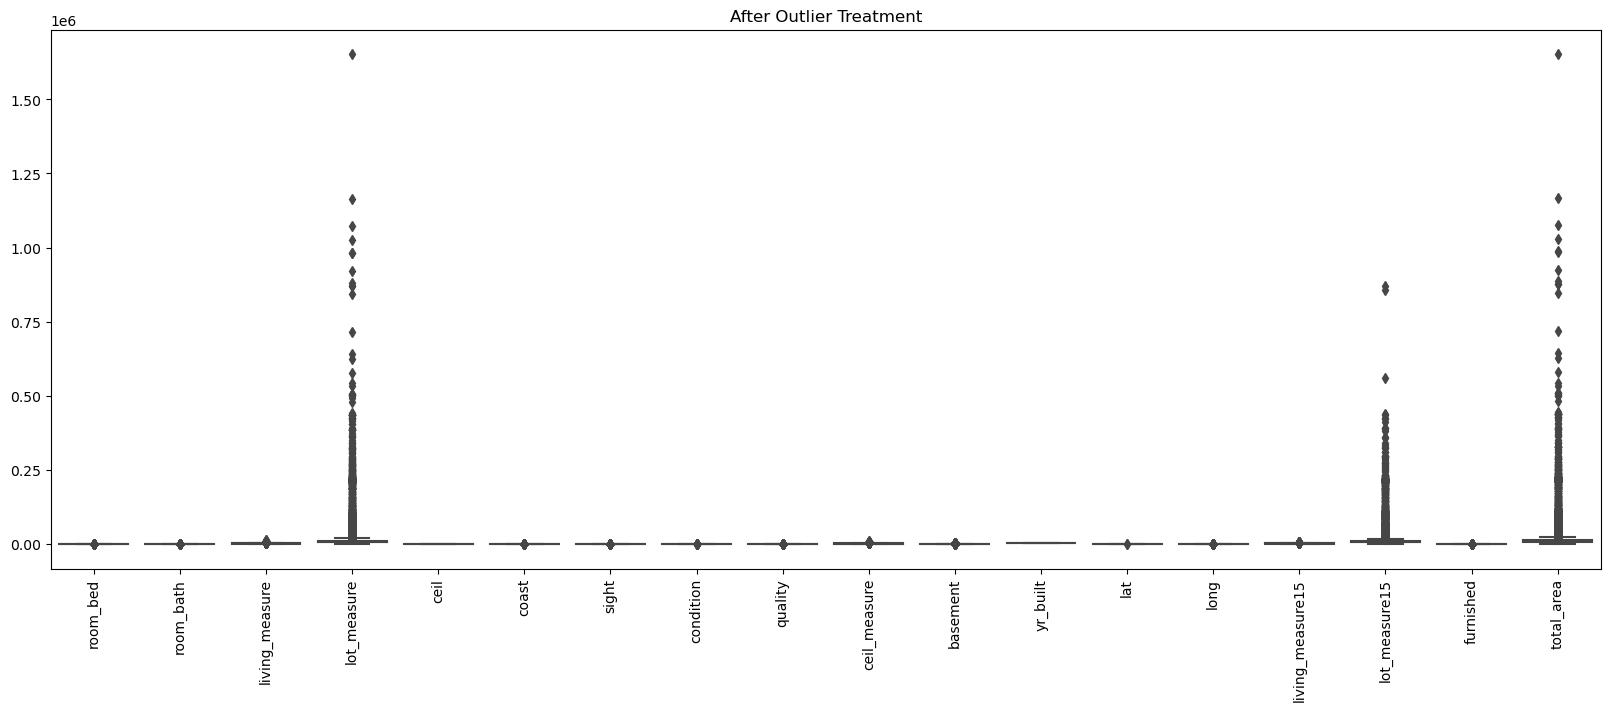

In [33]:
# Before Outlier treatment 
# construct box plot for continuous variables
# construct box plot for continuous variables
plt.figure(figsize=(20,7))
plt.xticks(rotation=90)
plt.title('After Outlier Treatment')
sns.boxplot(data=df.drop('price',axis=1)); 

In [34]:
# Alternative method to classify numeric and non-numeric features
num_col = df.select_dtypes(include=['number']).columns.tolist()
cat_col = df.select_dtypes(include=['object']).columns.tolist()

print("Numeric columns:", num_col)
print("Categorical columns:", cat_col)

Numeric columns: ['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure', 'basement', 'yr_built', 'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished', 'total_area']
Categorical columns: []


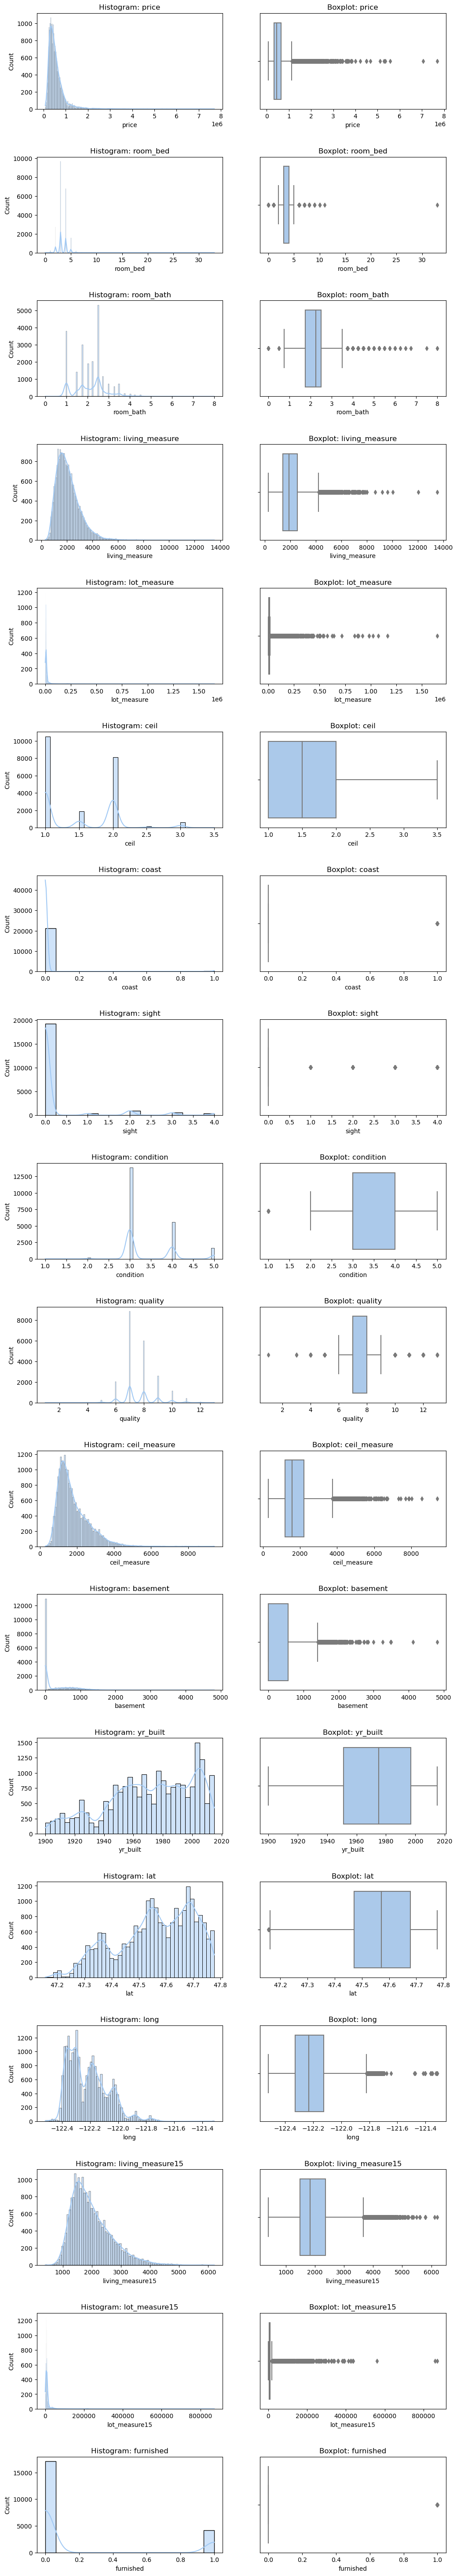

In [35]:
fig,axes = plt.subplots(18,2,figsize=(12,75))
plt.subplots_adjust(hspace=.5) #wspace
for i,j in zip(num_col,axes):
    sns.histplot(x=i,kde=True,data = df,ax=j[0])
    j[0].set_title('Histogram: '+i)
    sns.boxplot(x=i,data=df,ax=j[1],orient='h')
    j[1].set_title('Boxplot: '+i)

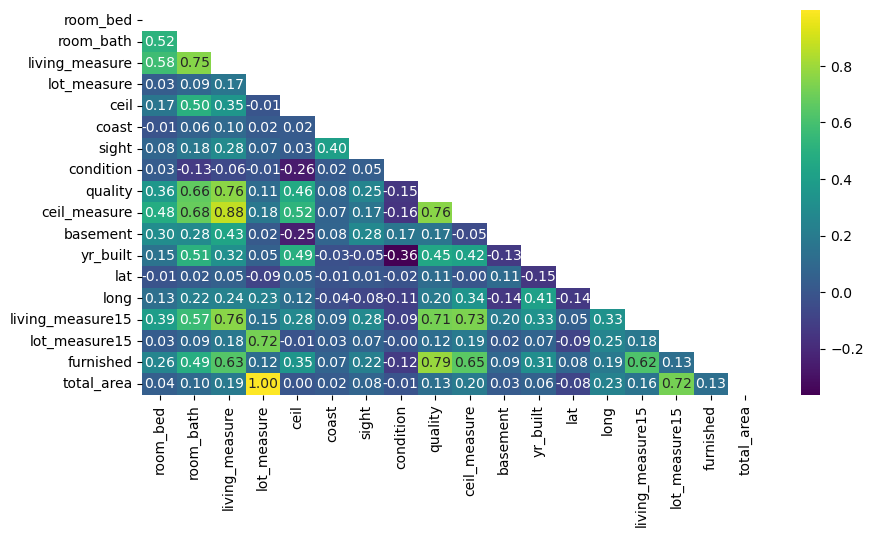

In [36]:
# Correlation
plt.figure(figsize = (10,5))
matrix=np.triu(df.loc[:, df.columns != "price"].corr())
sns.heatmap(df.loc[:, df.columns != "price"].corr(),annot=True,fmt='.2f',cmap="viridis", mask=matrix) 
plt.show()

In [37]:
df['total_area'].corr(df['lot_measure'])

0.9997638020866612

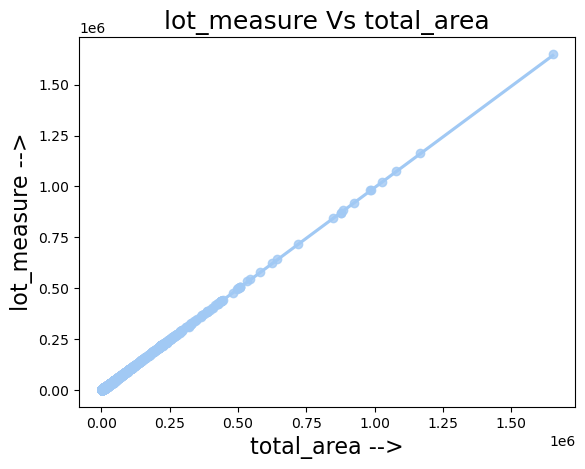

In [38]:
#> Perfect Positive correlation 
sns.regplot(x=df['total_area'],y=df['lot_measure']);
plt.title("lot_measure Vs total_area",fontsize=18);
plt.xlabel('total_area -->',fontsize = 16);
plt.ylabel('lot_measure -->',fontsize = 16);
plt.show()


In [39]:
# Droping lot_measure as it has perfect positive correlation with total_area

df.drop('lot_measure',axis=1,inplace=True)

In [40]:
# Removing the columns - lat, long also as they are geographic locators which is not necessary for us.
df.drop(['lat','long'],axis=1,inplace=True)

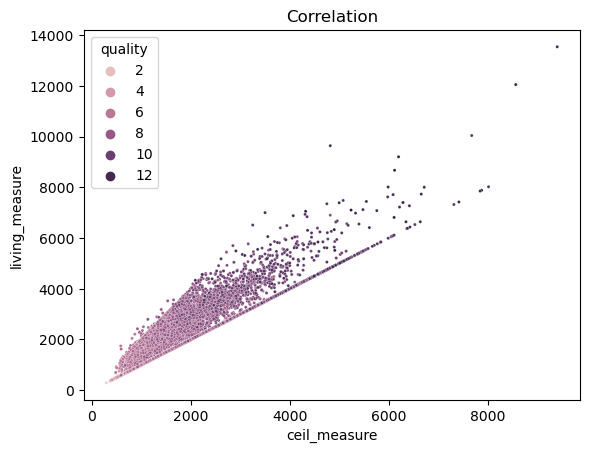

In [41]:
sns.scatterplot(x=df['ceil_measure'],y=df['living_measure'],hue=df['quality'],s=5).set(title="Correlation");

In [42]:
# Correlation values
df.corr()[df.corr()>0.6]

,price,room_bed,room_bath,living_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,living_measure15,lot_measure15,furnished,total_area
price,1.0,NaN,NaN,0.7,NaN,NaN,NaN,NaN,0.7,0.6,NaN,NaN,NaN,NaN,NaN,NaN
room_bed,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
room_bath,NaN,NaN,1.0,0.8,NaN,NaN,NaN,NaN,0.7,0.7,NaN,NaN,NaN,NaN,NaN,NaN
living_measure,0.7,NaN,0.8,1.0,NaN,NaN,NaN,NaN,0.8,0.9,NaN,NaN,0.8,NaN,0.6,NaN
ceil,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
coast,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sight,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quality,0.7,NaN,0.7,0.8,NaN,NaN,NaN,NaN,1.0,0.8,NaN,NaN,0.7,NaN,0.8,NaN
ceil_measure,0.6,NaN,0.7,0.9,NaN,NaN,NaN,NaN,0.8,1.0,NaN,NaN,0.7,NaN,0.7,NaN


In [43]:
# Correlation of variables with price
corr_with_price = df.corr()['price'].sort_values(ascending=False)
print(corr_with_price)

price              1.0
living_measure     0.7
quality            0.7
ceil_measure       0.6
living_measure15   0.6
furnished          0.6
room_bath          0.5
sight              0.4
basement           0.3
room_bed           0.3
coast              0.3
ceil               0.3
total_area         0.1
lot_measure15      0.1
yr_built           0.1
condition          0.0
Name: price, dtype: float64


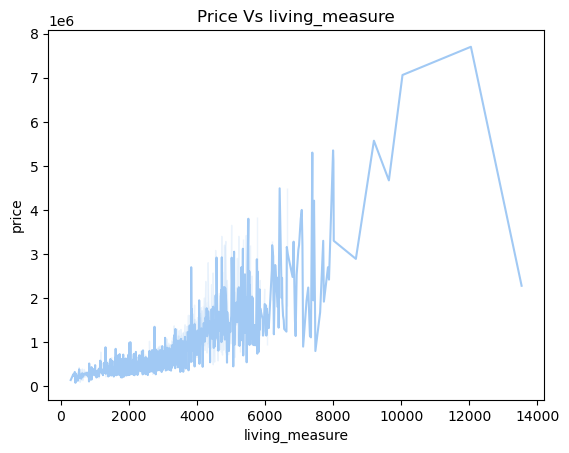

In [44]:
sns.lineplot(x='living_measure', y='price', data=df).set(title="Price Vs living_measure");

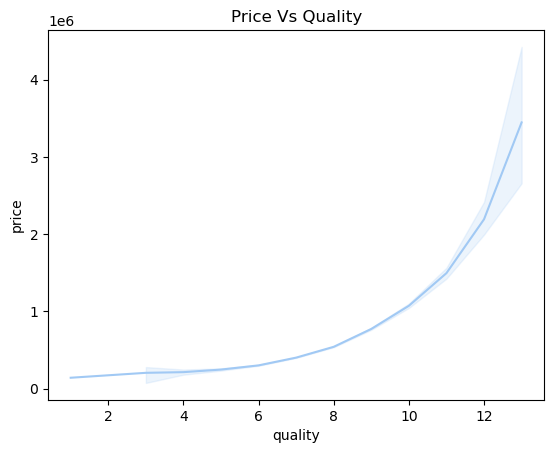

In [45]:
sns.lineplot(x='quality', y='price', data=df).set(title="Price Vs Quality");

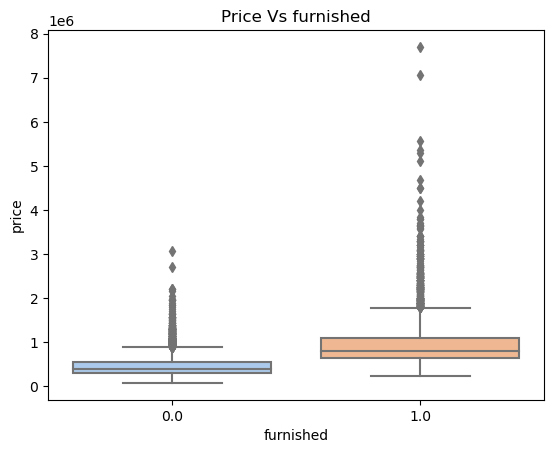

In [46]:
sns.boxplot(y='price', x='furnished', data=df).set(title="Price Vs furnished");

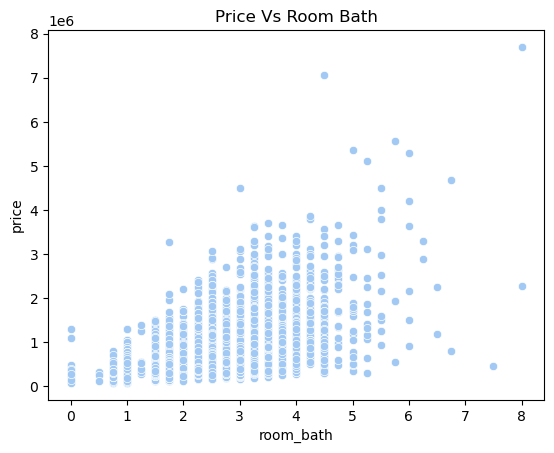

In [47]:
sns.scatterplot(x='room_bath', y='price', data=df).set(title="Price Vs Room Bath");

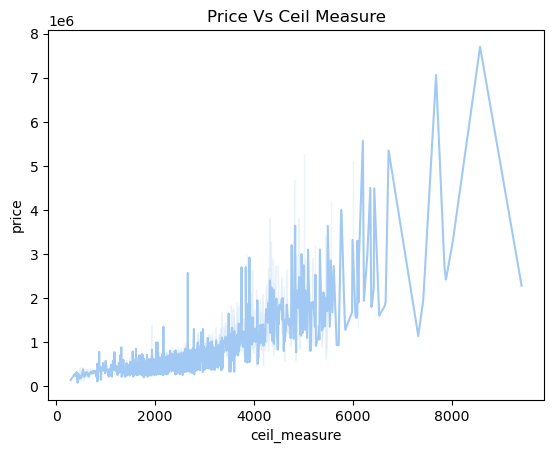

In [48]:
sns.lineplot(x='ceil_measure', y='price', data=df).set(title="Price Vs Ceil Measure");

In [49]:
#outlier treatment
def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Capping outliers
    return x.apply(lambda y: dt if y > upper_bound else y).apply(lambda y: q5 if y < lower_bound else y)


In [50]:
outlier_list=['room_bed','room_bath','living_measure','ceil_measure','basement','living_measure15','lot_measure15','total_area']

In [51]:
for i in df[outlier_list]:    
    df[i]=treat_outlier(df[i])

ValueError: Could not interpret value `lot_measure` for parameter `x`

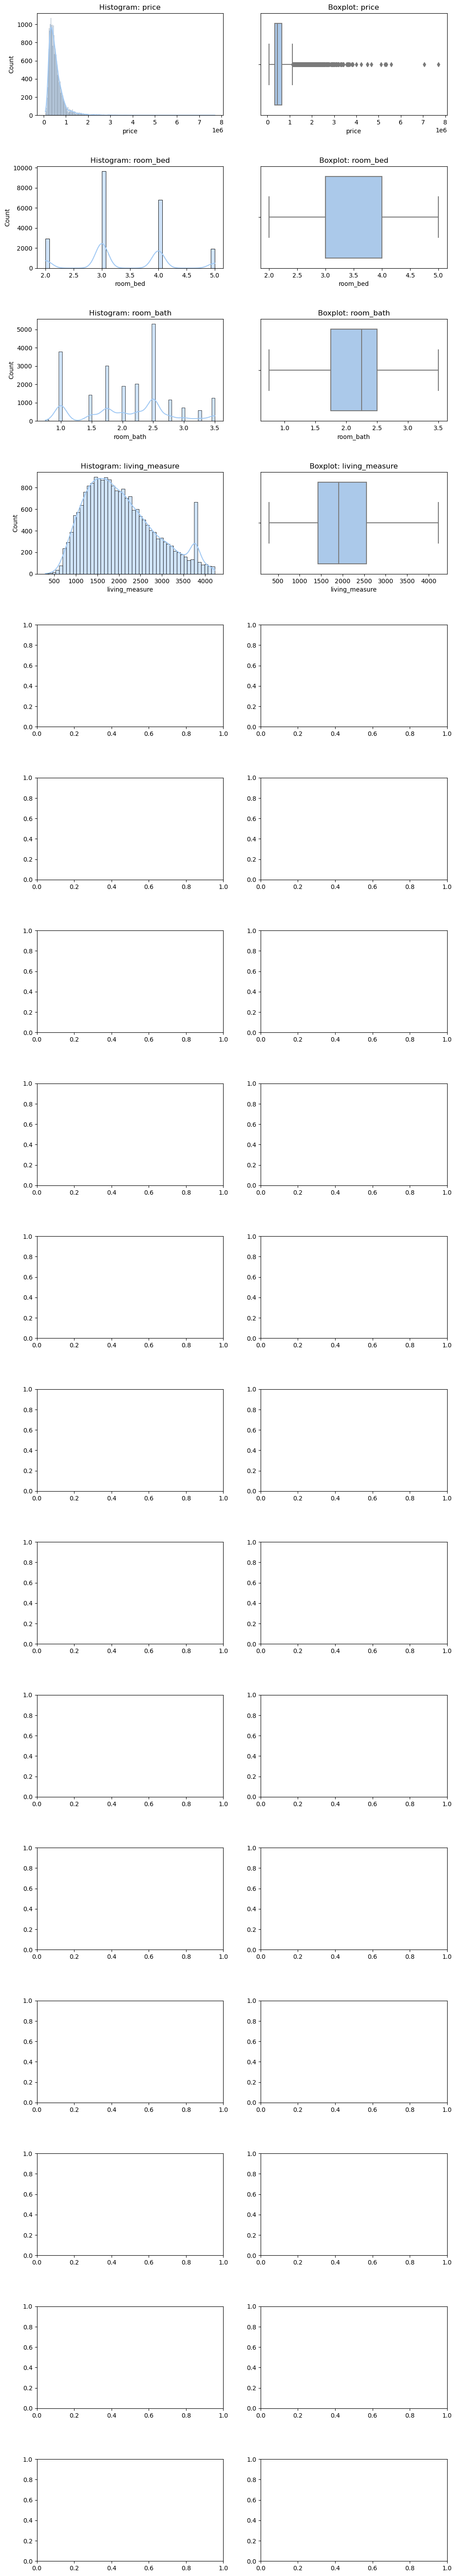

In [52]:
#> The outliers are treated

fig,axes = plt.subplots(17,2,figsize=(12,75))
plt.subplots_adjust(hspace=.5) #wspace
for i,j in zip(num_col,axes):
    sns.histplot(x=i,kde=True,data = df,ax=j[0])
    j[0].set_title('Histogram: '+i)
    sns.boxplot(x=i,data=df,ax=j[1],orient='h')
    j[1].set_title('Boxplot: '+i)

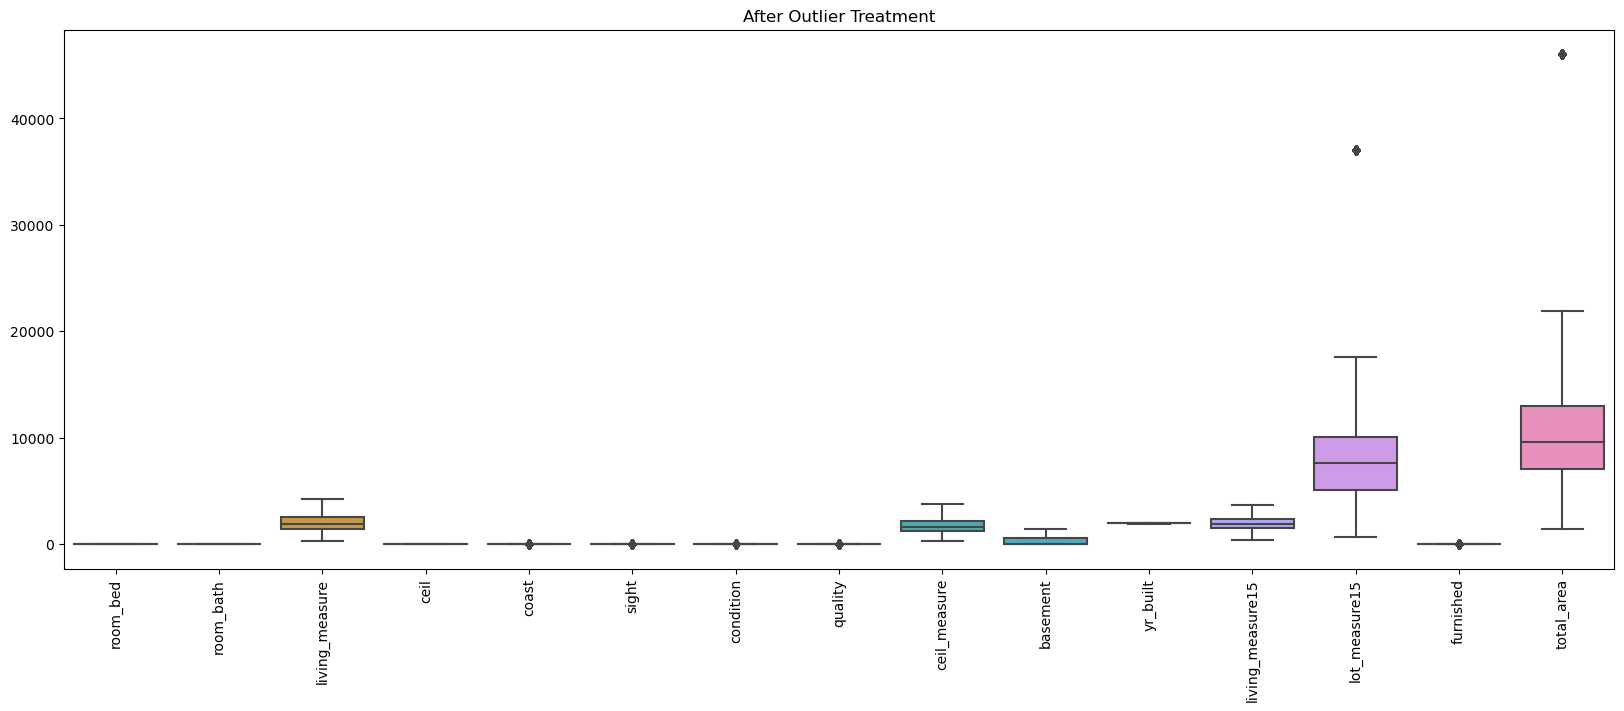

In [ ]:
# After Outlier treatment 
# construct box plot for continuous variables
# construct box plot for continuous variables
plt.figure(figsize=(20,7))
plt.xticks(rotation=90)
plt.title('After Outlier Treatment')
sns.boxplot(data=df.drop('price',axis=1)); 

In [53]:
df.head(5)

,price,room_bed,room_bath,living_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,living_measure15,lot_measure15,furnished,total_area
0,600000,4.0,1.8,"3,050.0",1.0,0.0,0.0,3.0,8.0,"1,800.0","1,250.0",1966,"2,020.0","8,660.0",0.0,"12,490.0"
1,190000,2.0,1.0,670.0,1.0,0.0,0.0,4.0,6.0,670.0,0.0,1948,"1,660.0","4,100.0",0.0,"3,771.0"
2,735000,4.0,2.8,"3,040.0",2.0,1.0,4.0,3.0,8.0,"3,040.0",0.0,1966,"2,620.0","2,433.0",0.0,"5,455.0"
3,257000,3.0,2.5,"1,740.0",2.0,0.0,0.0,3.0,8.0,"1,740.0",0.0,2009,"2,030.0","3,794.0",0.0,"5,461.0"
4,450000,2.0,1.0,"1,120.0",1.0,0.0,0.0,3.0,7.0,"1,120.0",0.0,1924,"1,120.0","5,100.0",0.0,"5,710.0"


<h3>SCALING THE DATA<h3>
The data needs to scaled to smaller values using z-score for convenience.


In [54]:
# train test split 

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# To standardize and normalize the data in X_train and X_test, you can use the StandardScaler. It uses z-score standardisation.
#StandardScaler standardize features by removing the mean and scaling to unit variance.
#The standard score of a sample x is calculated as:
# z = (x - u) / s (The formula for calculating a z-score)

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

In [56]:
# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
X_train_sc=pd.DataFrame(X_train_scaled,columns=X.columns)
#Here the scaled train data has been transformed back into a dataframe with same columns as original dataset.

In [59]:
X_test_sc=pd.DataFrame(X_test_scaled,columns=X.columns)

#Here the scaled test data has been transformed back into a dataframe with same columns as original dataset.

In [60]:
X_test_sc.head(5)

,room_bed,room_bath,living_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,living_measure15,lot_measure15,furnished,total_area
0,-0.4,-1.5,-1.0,-0.9,-0.1,-0.3,-0.6,-0.6,-0.7,-0.7,-0.2,-0.8,-0.3,-0.5,-0.4
1,2.0,-0.1,0.1,-0.9,-0.1,-0.3,-0.6,-0.6,-0.7,1.5,-0.6,-0.4,-0.6,-0.5,-0.6
2,-0.4,0.6,-0.1,0.9,-0.1,-0.3,-0.6,0.3,0.3,-0.7,1.0,-0.4,-0.7,-0.5,-0.6
3,-0.4,0.6,0.2,-0.9,-0.1,-0.3,0.9,0.3,0.1,0.1,0.3,0.5,2.8,-0.5,0.4
4,-0.4,-0.8,-0.6,0.9,-0.1,-0.3,-0.6,0.3,-0.3,-0.7,-1.9,0.2,-0.7,-0.5,-0.9


<h3>Modeling</h3>
<h4>We will be using 6 different classification models to find out which is the optimum model.

The following models will be tried out:
1. Linear Regression
2. Decision tree
3. Random forest
4. KNN (K nearest neighbour)
5. Bagging
6. XG Boost
7. OLS Statsmodel</h4>


<h3>We will be using the following metrics to evaluate the models.</h3>
<h4>RMSE: Indicates the standard deviation of the residuals (prediction errors). A lower RMSE indicates a better fit.</h4>
<h4>R-squared: Indicates the proportion of the variance in the dependent variable that is predictable from the independent variable(s). Ranges from 0 to 1, with higher values indicating a better fit.</h4>
Adjusted R-squared: Adjusts the R-squared value based on the number of predictors in the model. It accounts for the model's complexity and is more reliable for multiple regression models.

<h3>1. Linear Regression</h3>

In [61]:
# Linear Regression fit using X_train and y_train

from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
lr_model = LinearRegression()

# Fit the model on the training data
lr_model.fit(X_train_sc, y_train)

LinearRegression()

In [62]:
# Predict the target variable for the test data
y_pred = lr_model.predict(X_test_sc)

In [63]:
# Evaluate the model by RMSE, R square and adjusted R square

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate RMSE
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-square
r2_lr = r2_score(y_test, y_pred)

# Calculate adjusted R-square
n = len(X_test)
p = X_test.shape[1]
adj_r2_lr = 1 - (1 - r2_lr) * (n - 1) / (n - p - 1)

print(f"RMSE: {rmse_lr}")
print(f"R-square: {r2_lr}")
print(f"Adjusted R-square: {adj_r2_lr}")

RMSE: 219425.95556302863
R-square: 0.5989749610955273
Adjusted R-square: 0.5975569093313672


In [64]:
# Evaluate the model by RMSE, R square and adjusted R square for train set


# Predict the target variable for the train data
y_train_pred = lr_model.predict(X_train_sc)

# Calculate RMSE for train set
rmse_lr_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Calculate R-square for train set
r2_lr_train = r2_score(y_train, y_train_pred)

# Calculate adjusted R-square for train set
n_train = len(X_train)
adj_r2_lr_train = 1 - (1 - r2_lr_train) * (n_train - 1) / (n_train - p - 1)

print(f"Train set RMSE: {rmse_lr_train}")
print(f"Train set R-square: {r2_lr_train}")
print(f"Train set Adjusted R-square: {adj_r2_lr_train}")

Train set RMSE: 226550.7269884111
Train set R-square: 0.6254873625293447
Train set Adjusted R-square: 0.6251571821154467


<h3>2. Decision tree<h3>

In [65]:
# Decision tree model with best parameters for X_train and y_train and predict y_pred for test set
# Create a Decision Tree Regressor object

from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()

In [66]:
# Fit the model on the training data
dt_model.fit(X_train_sc, y_train)

DecisionTreeRegressor()

In [67]:
# Predict the target variable for the test data
y_pred_dt = dt_model.predict(X_test_sc)


In [68]:
# Evaluate the Decision tree model by RMSE, R square, and adjusted R square

# Calculate RMSE
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))

# Calculate R-square
r2_dt = r2_score(y_test, y_pred_dt)

# Calculate adjusted R-square
n_dt = len(X_test)
p_dt = X_test.shape[1]
adj_r2_dt = 1 - (1 - r2_dt) * (n_dt - 1) / (n_dt - p_dt - 1)

print(f"Decision Tree Model:")
print(f"RMSE: {rmse_dt}")
print(f"R-square: {r2_dt}")
print(f"Adjusted R-square: {adj_r2_dt}")

Decision Tree Model:
RMSE: 259061.59167849552
R-square: 0.44101320063147276
Adjusted R-square: 0.4390365853578925


In [69]:
# Evaluate the Decision tree model by RMSE, R square, and adjusted R square for train set
# Predict the target variable for the train data
y_train_pred_dt = dt_model.predict(X_train_sc)

# Calculate RMSE for train set
rmse_dt_train = np.sqrt(mean_squared_error(y_train, y_train_pred_dt))

# Calculate R-square for train set
r2_dt_train = r2_score(y_train, y_train_pred_dt)

# Calculate adjusted R-square for train set
n_dt_train = len(X_train)
p_dt_train = X_train.shape[1]
adj_r2_dt_train = 1 - (1 - r2_dt_train) * (n_dt_train - 1) / (n_dt_train - p_dt_train - 1)

print(f"Train set RMSE: {rmse_dt_train}")
print(f"Train set R-square: {r2_dt_train}")
print(f"Train set Adjusted R-square: {adj_r2_dt_train}")

Train set RMSE: 13605.501015665948
Train set R-square: 0.99864928216334
Train set Adjusted R-square: 0.998648091334167


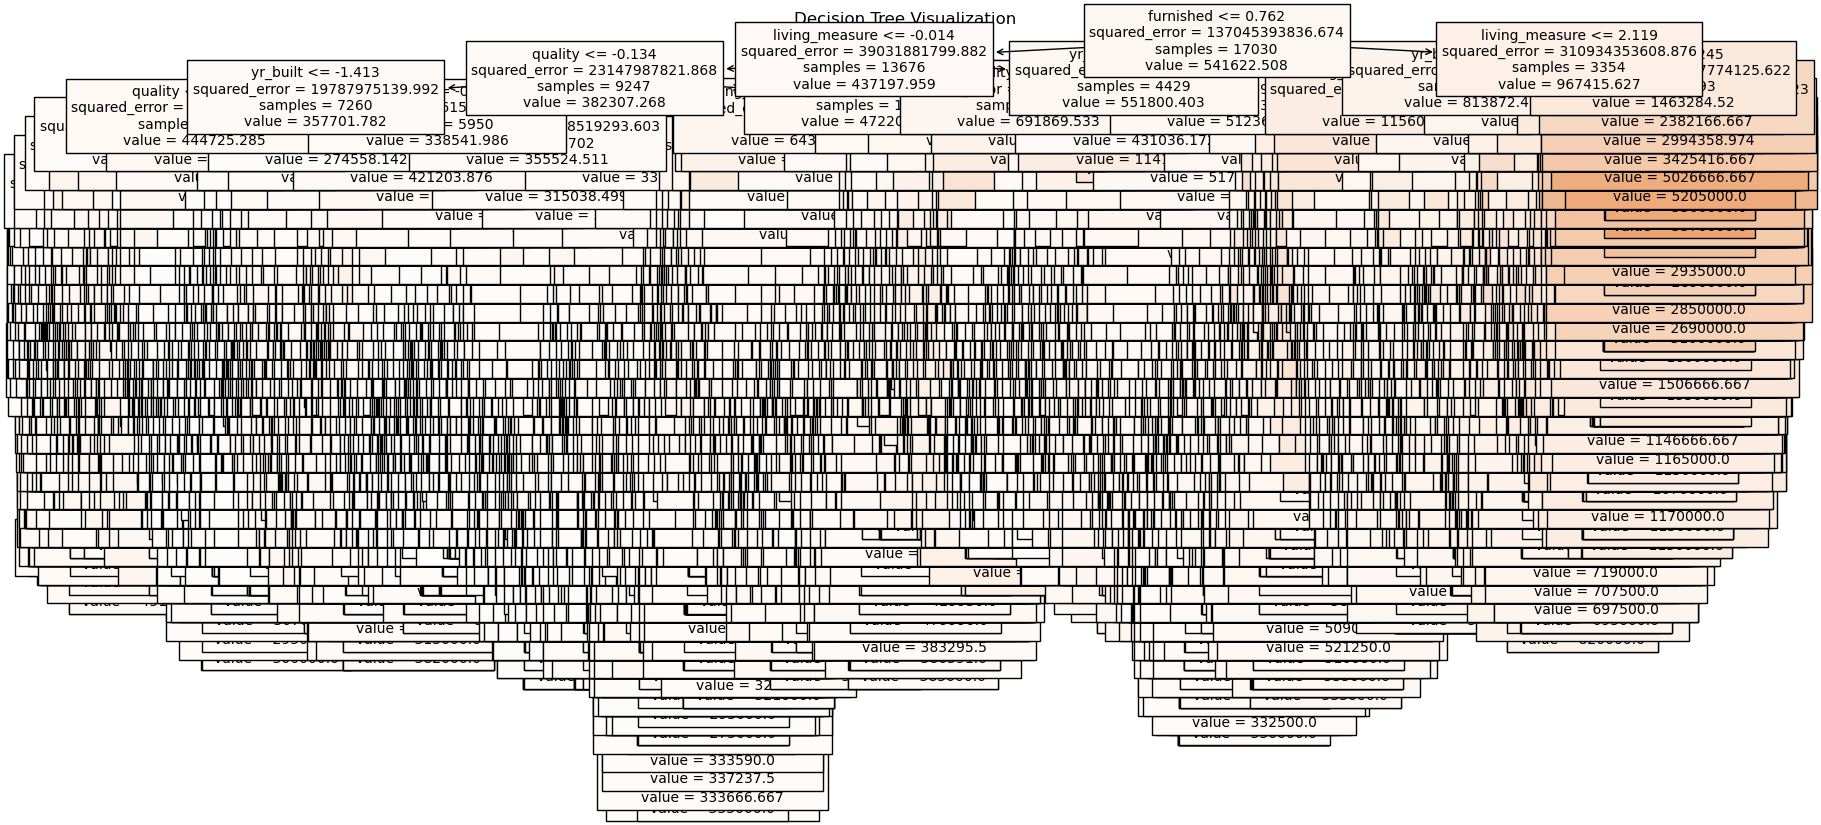

In [100]:
# Importing necessary libraries
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))  # Set the figure size for better visualization
plot_tree(dt_model, filled=True, feature_names=X_train.columns, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()


<h3>3. Random Forest</h3>


In [70]:
# Create Random Forest for X_train and y_train and predict y_pred for test set

from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor object
rf_model = RandomForestRegressor()

# Fit the model on the training data
rf_model.fit(X_train_sc, y_train)

# Predict the target variable for the test data
y_pred_rf = rf_model.predict(X_test_sc)

In [71]:
# Evaluate the Random Forest model by RMSE, R square, and adjusted R square

# Calculate RMSE
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# Calculate R-square
r2_rf = r2_score(y_test, y_pred_rf)

# Calculate adjusted R-square
n_rf = len(X_test)
p_rf = X_test.shape[1]
adj_r2_rf = 1 - (1 - r2_rf) * (n_rf - 1) / (n_rf - p_rf - 1)

print("Random Forest Model:")
print(f"RMSE: {rmse_rf}")
print(f"R-square: {r2_rf}")
print(f"Adjusted R-square: {adj_r2_rf}")

Random Forest Model:
RMSE: 178576.55839377135
R-square: 0.7343900191110015
Adjusted R-square: 0.7334508041856515


In [73]:
# Evaluate the Random Forest model by RMSE, R square, and adjusted R square for train set

# Predict the target variable for the train data
y_train_pred_rf = rf_model.predict(X_train_sc)

# Calculate RMSE for train set
rmse_rf_train = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))

# Calculate R-square for train set
r2_rf_train = r2_score(y_train, y_train_pred_rf)

# Calculate adjusted R-square for train set
n_rf_train = len(X_train)
p_rf_train = X_train.shape[1]
adj_r2_rf_train = 1 - (1 - r2_rf_train) * (n_rf_train - 1) / (n_rf_train - p_rf_train - 1)

print("Random Forest Model (Train Set):")
print(f"RMSE: {rmse_rf_train}")
print(f"R-square: {r2_rf_train}")
print(f"Adjusted R-square: {adj_r2_rf_train}")

Random Forest Model (Train Set):
RMSE: 71378.36370608791
R-square: 0.9628234801424231
Adjusted R-square: 0.9627907043226357


In [74]:
# Performing Hyper parameter tuning for Random Forest to improve model performance

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [None, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 3, 5]
}

In [76]:
# Create a Random Forest model instance
rf_model = RandomForestRegressor()

# Perform GridSearchCV for hyperparameter tuning
# (*Note: This step will take approx 1 hr to complete, hence commented out here. To execute please remove the # below)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 7],
                         'min_samples_leaf': [2, 3, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [77]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [78]:
# build a random forest model with parameters 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100

rf_model_best = RandomForestRegressor(max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100)


In [79]:
# Fit the model on the training data
rf_model_best.fit(X_train_sc, y_train)

# Predict the target variable for the test data
y_pred_rf = rf_model_best.predict(X_test_sc)

In [80]:
# Evaluate the Random Forest model by RMSE, R square, and adjusted R square
rmse_rf_best = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf_best = r2_score(y_test, y_pred_rf)
n_rf_best = len(X_test)
p_rf_best = X_test.shape[1]
adj_r2_rf_best = 1 - (1 - r2_rf) * (n_rf - 1) / (n_rf - p_rf - 1)

print("Random Forest Model:")
print(f"RMSE: {rmse_rf_best}")
print(f"R-square: {r2_rf_best}")
print(f"Adjusted R-square: {adj_r2_rf_best}")

Random Forest Model:
RMSE: 177025.60329077794
R-square: 0.7389836819001194
Adjusted R-square: 0.7334508041856515


In [81]:
# IF non-scaled data is used (X_train, X_test)

# Train the model with the best parameters
# rf_model_best = RandomForestRegressor(**best_params)
rf_model_best = RandomForestRegressor(**best_params)
rf_model_best.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=2, min_samples_split=5, n_estimators=300)

In [82]:
print(best_params)

{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}


In [83]:
# Use the trained model for prediction
y_pred = rf_model_best.predict(X_test)

In [84]:
# Calculate evaluation metrics
rmse_rf_best = mean_squared_error(y_test, y_pred, squared=False)
r2_rf_best = r2_score(y_test, y_pred)

n_rf_best = len(X_test)
p_rf_best = X_test.shape[1]
adj_r2_rf_best = 1 - (1 - r2_rf_best) * (n_rf_best - 1) / (n_rf_best - p_rf_best - 1)

print("Random Forest Model (Tuned):")
print(f"RMSE: {rmse_rf_best}")
print(f"R-square: {r2_rf_best}")
print(f"Adjusted R-square: {adj_r2_rf_best}")

Random Forest Model (Tuned):
RMSE: 176695.41791199168
R-square: 0.7399564609326528
Adjusted R-square: 0.7390369293235037


<h3>4. KNN Model</h3>

In [85]:
# Create KNN for X_train and y_train and predict y_pred for test set

from sklearn.neighbors import KNeighborsRegressor

# Create a KNN Regressor object
knn_model = KNeighborsRegressor()

# Fit the model on the training data
knn_model.fit(X_train_sc, y_train)

# Predict the target variable for the test data
y_pred_knn = knn_model.predict(X_test_sc)

In [86]:
# Evaluate the KNN model by RMSE, R square, and adjusted R square

# Calculate RMSE
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))

# Calculate R-square
r2_knn = r2_score(y_test, y_pred_knn)

# Calculate adjusted R-square
n_knn = len(X_test)
p_knn = X_test.shape[1]
adj_r2_knn = 1 - (1 - r2_knn) * (n_knn - 1) / (n_knn - p_knn - 1)

print("KNN Model:")
print(f"RMSE: {rmse_knn}")
print(f"R-square: {r2_knn}")
print(f"Adjusted R-square: {adj_r2_knn}")

KNN Model:
RMSE: 195920.73104987506
R-square: 0.6802899574820773
Adjusted R-square: 0.6791594410658187


In [87]:
# Evaluate the KNN model by RMSE, R square, and adjusted R square fro train set

rmse_knn_train = np.sqrt(mean_squared_error(y_train, knn_model.predict(X_train_sc)))
r2_knn_train = r2_score(y_train, knn_model.predict(X_train_sc))
n_knn_train = len(X_train)
p_knn_train = X_train.shape[1]
adj_r2_knn_train = 1 - (1 - r2_knn_train) * (n_knn_train - 1) / (n_knn_train - p_knn_train - 1)

print("KNN Model (Train Set):")
print(f"RMSE: {rmse_knn_train}")
print(f"R-square: {r2_knn_train}")
print(f"Adjusted R-square: {adj_r2_knn_train}")

KNN Model (Train Set):
RMSE: 170026.33493205873
R-square: 0.7890556277660725
Adjusted R-square: 0.7888696535340571


<h3>5. Bagging</h3>

In [88]:
# Create Bagging model (base model will be Decision tree) for X_train and y_train and predict y_pred for test set
from sklearn.ensemble import BaggingRegressor

# Create a Bagging Regressor object
bagging_model = BaggingRegressor()

# Fit the model on the training data
bagging_model.fit(X_train_sc, y_train)

# Predict the target variable for the test data
y_pred_bagging = bagging_model.predict(X_test_sc)

In [89]:
# Evaluate the Bagging model by RMSE, R-square, and adjusted R-square

# Calculate RMSE
rmse_bagging = np.sqrt(mean_squared_error(y_test, y_pred_bagging))

# Calculate R-square
r2_bagging = r2_score(y_test, y_pred_bagging)

# Calculate adjusted R-square
n_bagging = len(X_test)
p_bagging = X_test.shape[1]
adj_r2_bagging = 1 - (1 - r2_bagging) * (n_bagging - 1) / (n_bagging - p_bagging - 1)

print("Bagging Model:")
print(f"RMSE: {rmse_bagging}")
print(f"R-square: {r2_bagging}")
print(f"Adjusted R-square: {adj_r2_bagging}")

Bagging Model:
RMSE: 186151.60765310595
R-square: 0.7113782367875057
Adjusted R-square: 0.7103576506375322


In [90]:
# Evaluate the Bagging model by RMSE, R-square, and adjusted R-square for train set

# Calculate RMSE
rmse_bagging_train = np.sqrt(mean_squared_error(y_train, bagging_model.predict(X_train_sc)))

# Calculate R-square
r2_bagging_train = r2_score(y_train, bagging_model.predict(X_train_sc))

# Calculate adjusted R-square
n_bagging_train = len(X_train)
p_bagging_train = X_train.shape[1]
adj_r2_bagging_train = 1 - (1 - r2_bagging_train) * (n_bagging_train - 1) / (n_bagging_train - p_bagging_train - 1)

print("Bagging Model (Train Set):")
print(f"RMSE: {rmse_bagging_train}")
print(f"R-square: {r2_bagging_train}")
print(f"Adjusted R-square: {adj_r2_bagging_train}")

Bagging Model (Train Set):
RMSE: 85312.57460400151
R-square: 0.946891791239352
Adjusted R-square: 0.9468449696141369


<h3>6. XG Boost</h3>

In [91]:
# Create XG-boost model for X_train and y_train and predict y_pred for test set

from xgboost import XGBRegressor

#Create an XGBoost Regressor object
xgb_model = XGBRegressor()

#Fit the model on the training data
xgb_model.fit(X_train_sc, y_train)

#Predict the target variable for the test data
y_pred_xgb = xgb_model.predict(X_test_sc)

In [92]:
# Evaluate the XGBoost model by RMSE, R-square, and adjusted R-square

# Calculate RMSE
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

# Calculate R-square
r2_xgb = r2_score(y_test, y_pred_xgb)

# Calculate adjusted R-square
n_xgb = len(X_test)
p_xgb = X_test.shape[1]
adj_r2_xgb = 1 - (1 - r2_xgb) * (n_xgb - 1) / (n_xgb - p_xgb - 1)

print("XGBoost Model:")
print(f"RMSE: {rmse_xgb}")
print(f"R-square: {r2_xgb}")
print(f"Adjusted R-square: {adj_r2_xgb}")

XGBoost Model:
RMSE: 182267.7129375257
R-square: 0.7232962905140443
Adjusted R-square: 0.7223178474111944


In [93]:
# Evaluate the XGBoost model by RMSE, R-square, and adjusted R-square for train set

# Calculate RMSE
rmse_xgb_train = np.sqrt(mean_squared_error(y_train, xgb_model.predict(X_train_sc)))

# Calculate R-square
r2_xgb_train = r2_score(y_train, xgb_model.predict(X_train_sc))

# Calculate adjusted R-square
n_xgb_train = len(X_train)
p_xgb_train = X_train.shape[1]
adj_r2_xgb_train = 1 - (1 - r2_xgb_train) * (n_xgb_train - 1) / (n_xgb_train - p_xgb_train - 1)

print("XGBoost Model (Train Set):")
print(f"RMSE: {rmse_xgb_train}")
print(f"R-square: {r2_xgb_train}")
print(f"Adjusted R-square: {adj_r2_xgb_train}")

XGBoost Model (Train Set):
RMSE: 107947.96803001578
R-square: 0.914971503415163
Adjusted R-square: 0.9148965400056901


<h3>7. OLS Statsmodel</h3>

In [94]:
# Creating statsmodel OLS(Ordinary Least Squares) regression model for X_train and y_train and predict y_pred for test set 

import statsmodels.api as sm

# Create a statsmodel OLS (Ordinary Least Squares) regression model
ols_model = sm.OLS(y_train, X_train)

# Fit the model on the training data
results = ols_model.fit()

# Predict the target variable for the test data
y_pred_statsmodel = results.predict(X_test)

In [95]:
# Evaluate the statsmodel OLS model by RMSE, R-square, and adjusted R-square

# Calculate RMSE
rmse_statsmodel = np.sqrt(mean_squared_error(y_test, y_pred_statsmodel))

# Calculate R-square
r2_statsmodel = r2_score(y_test, y_pred_statsmodel)

# Calculate adjusted R-square
n_statsmodel = len(X_test)
p_statsmodel = X_test.shape[1]
adj_r2_statsmodel = 1 - (1 - r2_statsmodel) * (n_statsmodel - 1) / (n_statsmodel - p_statsmodel - 1)

print("Statsmodel OLS Model:")
print(f"RMSE: {rmse_statsmodel}")
print(f"R-square: {r2_statsmodel}")
print(f"Adjusted R-square: {adj_r2_statsmodel}")

Statsmodel OLS Model:
RMSE: 230968.67303523506
R-square: 0.555674077247156
Adjusted R-square: 0.5541029106179027


In [96]:
# Evaluate the statsmodel OLS model by RMSE, R-square, and adjusted R-square for train set

# Calculate RMSE
rmse_train_statsmodel = np.sqrt(mean_squared_error(y_train, results.predict(X_train)))

# Calculate R-square
r2_train_statsmodel = r2_score(y_train, results.predict(X_train))

# Calculate adjusted R-square
n_train_statsmodel = len(X_train)
p_train_statsmodel = X_train.shape[1]
adj_r2_train_statsmodel = 1 - (1 - r2_train_statsmodel) * (n_train_statsmodel - 1) / (n_train_statsmodel - p_train_statsmodel - 1)

print("Statsmodel OLS Model (Train Set):")
print(f"RMSE: {rmse_train_statsmodel}")
print(f"R-square: {r2_train_statsmodel}")
print(f"Adjusted R-square: {adj_r2_train_statsmodel}")

Statsmodel OLS Model (Train Set):
RMSE: 236170.55321913838
R-square: 0.5930068961361348
Adjusted R-square: 0.5926480800694862


In [98]:
# derive business recommendations insights from the rf_model_best

# Get the feature importances from the XGBoost model
feature_importances = rf_model_best.feature_importances_

# Sort the feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Get the top 5 features
top_features_rf = X.columns[sorted_indices]

# Print the business recommendation insights
print("Business Recommendation Insights:")
print("Top important features (from Random Forest(Tuned)model):")
for feature in top_features_rf:
    print(f"- {feature}") 

Business Recommendation Insights:
Top important features (from Random Forest(Tuned)model):
- quality
- living_measure
- yr_built
- furnished
- living_measure15
- coast
- lot_measure15
- total_area
- sight
- ceil_measure
- basement
- room_bath
- room_bed
- condition
- ceil


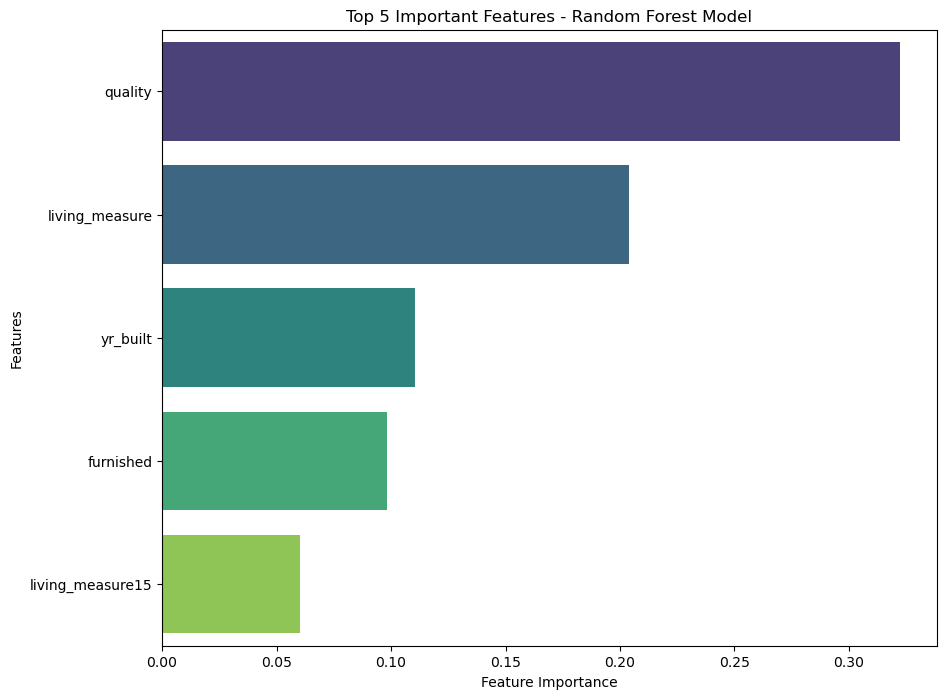

In [101]:
# Plotting the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances[sorted_indices][:5], y=top_features_rf[:5], palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 5 Important Features - Random Forest Model')
plt.show()

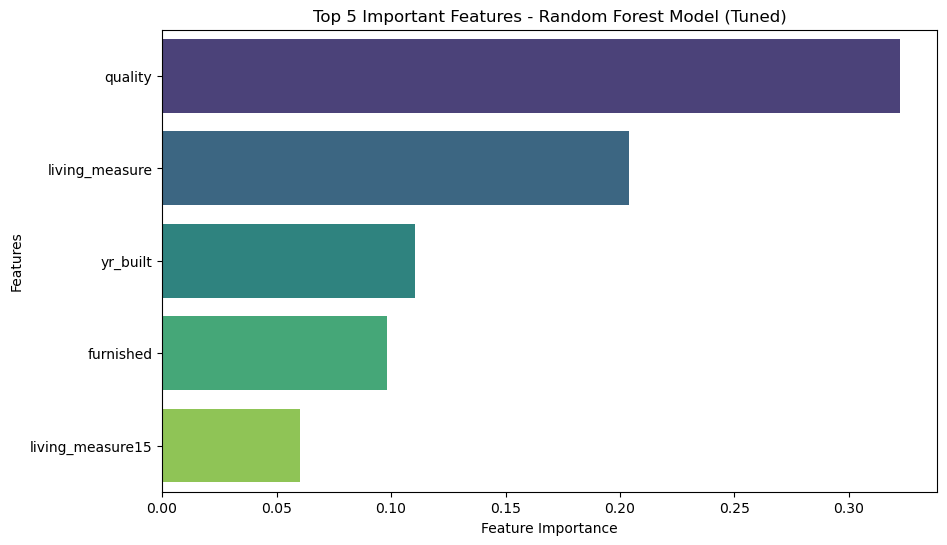

In [103]:


# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[sorted_indices][:5], y=top_features_rf[:5], palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 5 Important Features - Random Forest Model (Tuned)')
plt.show()


In [97]:
# deriving business recommendations insights from the xgb_model

# Get the feature importances from the XGBoost model
feature_importances = xgb_model.feature_importances_

# Sort the feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Get the top 5 features
top_features_xgb = X.columns[sorted_indices]

# Print the business recommendation insights
print("Business Recommendation Insights:")
print("Top important features (from XG Boost model):")
for feature in top_features_xgb:
    print(f"- {feature}")

Business Recommendation Insights:
Top important features (from XG Boost model):
- quality
- coast
- living_measure
- sight
- yr_built
- basement
- living_measure15
- condition
- lot_measure15
- ceil
- room_bath
- ceil_measure
- total_area
- room_bed
- furnished


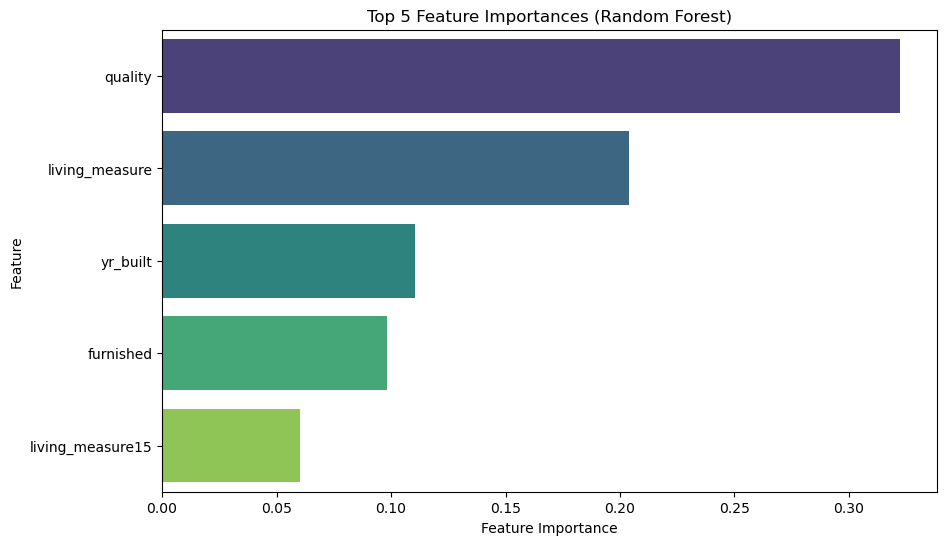

In [99]:

feature_importances = rf_model_best.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Get the top 5 features
top_n = 5
top_features_rf = X.columns[sorted_indices][:top_n]
top_importances_rf = feature_importances[sorted_indices][:top_n]

# Plot the top 5 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_importances_rf, y=top_features_rf, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 5 Feature Importances (Random Forest)')
plt.show()


<h3>Business Insights</h3>	

<h5>
•   The primary factor influencing housing prices is the quality rating of the property. This suggests that buyers place the highest value on the current quality of the house when determining its worth.

•	The living measure, or square footage, is a critical determinant of property value. Larger homes typically command higher prices, underscoring the importance of space in property valuation.

•	The year a house was built significantly affects its price. Newer constructions are perceived as higher quality, resulting in a higher valuation. Thus, 'yr_built' is one of the top five most important features.

•	Whether a house is furnished also impacts its price. A well-furnished home is valued higher, reflecting the added appeal and convenience of ready-to-live-in properties.

•	The living room area as of 2015, implying some renovations were made around that time, also plays a significant role in determining house prices.

•	Homes located in coastal areas with waterfront views are generally priced higher, as indicated by the 'coast' feature.

Interestingly, the number of bedrooms, bathrooms, and floors has minimal impact on house prices. This suggests that the overall size of the home is more important than its internal layout.

With an accurate and well-fitting prediction model, we can expect price predictions to deviate minimally from actual prices. This can help stakeholders get a reliable approximation of a house's expected price based on different features.

The feature importance derived from the model can guide buyers and sellers to focus on key factors that significantly impact property prices, while also identifying features that have little effect on value. This knowledge can lead to better decision-making in real estate transactions and improve the experience for customers seeking homes within specific price ranges and with features.

This understanding will enable more informed business decisions and enhance the experience for buyers seeking homes in their desired price range with the most valued features.</h5>
